In [99]:
import pandas as pd
from collections import defaultdict,OrderedDict
def change_time_format(time):
    time = time.replace("年","-").replace("月","-").replace("日","").replace("時",":").replace("分",":").replace("秒","")
    year = int(time.split("-")[0])
    time = time.replace(str(year),str(year+1911))
    time = time.split()
    ac_time = time[1].split(":")
    if int(ac_time[1]) > 0:
        ac_time[1] = "00"
        ac_time[0] = str(int(ac_time[0])+1)
    if len(ac_time[0]) < 2:
        ac_time[0] = "0" + ac_time[0]
    if ac_time[0] == '24':
        return time[0]+" "+"23"+":00:00"
    else:
        return time[0]+" "+ac_time[0]+":00:00"

def get_weather_data(district):
    import os
    path = "data/weather/all_data"
    all_weather = {}
    for filename in os.listdir(path):
        all_weather[filename.replace(".csv","")] = pd.read_csv(path+"/"+filename)
    DataWithWeather = []
    # 雨量
    all_rain =  defaultdict(list)
    # 風速
    all_WS = defaultdict(list)
    # 最大陣風
    all_WSGust = defaultdict(list)
    T_time = []
    for i in district["發生時間"].to_list():
        T_time.append(change_time_format(i))
    for i in range(0,len(district["測站"].to_list())):
        try:
            a = all_weather[district["測站"].to_list()[i].split("\'")[1]]["Unnamed: 18"].to_list().index(T_time[i])
            # print(a)
            precp = all_weather[district["測站"].to_list()[i].split("\'")[1]]["Precp"].to_list()[a]
            if precp == "t" or precp == "T" or precp == "&" or precp == "X":
                precp = float(0.0)
            WS = all_weather[district["測站"].to_list()[i].split("\'")[1]]["WS"].to_list()[a]
            if WS == "/" or WS == "X" or WS == "...":
                WS = float(0.0)
            WSGust = all_weather[district["測站"].to_list()[i].split("\'")[1]]["WSGust"].to_list()[a]
            if WSGust == "..." or WSGust == "X":
                WSGust = float(0.0)
            DataWithWeather.append([float(precp),float(WS),float(WSGust)])
            all_rain[T_time[i].split()[1].split(":")[0]].append(float(precp))
            all_WS[T_time[i].split()[1].split(":")[0]].append(float(WS))
            all_WSGust[T_time[i].split()[1].split(":")[0]].append(float(WSGust))
        except KeyError:
            DataWithWeather.append(["err"])
        except ValueError:
            DataWithWeather.append(["err"])
    return all_rain,all_WS,all_WSGust

In [100]:
Taipei =  pd.read_csv("data/updated/fixed_1_Taipei.csv")
New_Taipei =  pd.read_csv("data/updated/fixed_NewTaipei.csv")
Taoyuan = pd.read_csv("data/updated/fixed_Taoyuan.csv")
Tainan = pd.read_csv("data/updated/fixed_Tainan.csv")
Kaohsiung = pd.read_csv("data/updated/fixed_Kaohsiung.csv")

In [101]:
def draw(weather_data):
    clear_data = defaultdict()
    temp = []
    for i in weather_data.keys():
        temp.append(i)
    y = []
    for i in temp:
        for j in weather_data[i]:
            if j not in clear_data.keys():
                clear_data[j] = 1
            else:
                clear_data[j] += 1
    x = list(OrderedDict(sorted(clear_data.items())))
    x.pop(0)
    for i in x:
        y.append(clear_data[i])
    print(x)
    print(y)
    # 以下可以開始畫圖
    import matplotlib.pyplot as plt
    plt.bar(x,y)
    plt.show()
    
# draw(all_WS)

### 台北

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.2, 2.3, 2.5, 2.6, 2.9, 3.0, 3.3, 3.4, 3.5, 4.0, 4.2, 4.5, 5.0, 5.3, 5.5, 5.8, 6.0, 6.5, 7.0, 7.2, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 11.8, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 22.5, 23.0, 23.5, 24.0, 24.1, 24.5, 25.5, 27.5, 28.5, 29.0, 30.0, 31.0, 32.5, 33.0, 34.0, 35.5, 38.0, 40.0, 43.5, 50.0, 63.0, 64.5, 67.5, 92.9]
[62, 38, 29, 30, 725, 24, 14, 14, 11, 360, 10, 6, 2, 3, 208, 4, 4, 2, 2, 171, 1, 2, 120, 1, 1, 80, 1, 1, 61, 68, 2, 48, 44, 2, 27, 1, 27, 13, 25, 1, 20, 16, 9, 10, 17, 5, 7, 6, 7, 2, 3, 1, 10, 7, 4, 4, 6, 3, 3, 2, 3, 1, 4, 5, 1, 3, 4, 2, 4, 1, 1, 2, 1, 1, 2, 2, 3, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 3, 1, 1, 1, 1, 1]


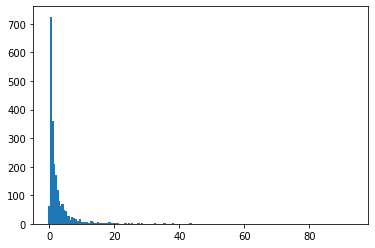

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.3, 7.5, 7.6, 7.8, 7.9, 8.0, 8.4, 8.6, 8.7, 9.3, 10.5]
[390, 423, 505, 429, 518, 537, 516, 533, 585, 568, 614, 553, 564, 634, 562, 613, 568, 678, 637, 644, 583, 610, 609, 544, 632, 561, 585, 497, 506, 451, 364, 372, 353, 356, 348, 277, 277, 233, 222, 208, 226, 191, 194, 126, 152, 128, 106, 109, 72, 56, 85, 69, 61, 42, 37, 34, 30, 20, 18, 32, 19, 16, 13, 11, 9, 14, 12, 12, 3, 4, 3, 6, 4, 3, 1, 2, 1, 2, 1, 1, 1, 1]


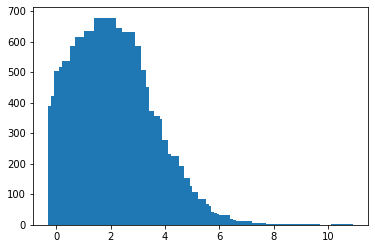

[1.0, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.9, 15.0, 15.1, 15.2, 15.3, 15.6, 15.7, 15.9, 16.1, 16.5, 16.7, 17.6, 17.8, 18.1, 18.9, 20.4, 21.2, 21.4, 21.5, 21.7]
[1, 4, 7, 6, 17, 5, 19, 29, 27, 27, 45, 52, 52, 64, 35, 63, 52, 62, 71, 38, 59, 40, 54, 77, 43, 48, 39, 49, 52, 37, 38, 54, 36, 47, 44, 53, 54, 33, 39, 60, 4

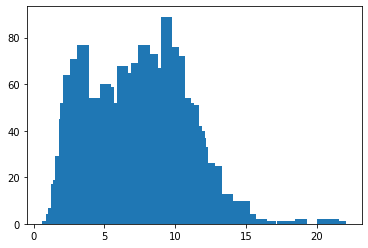

In [102]:
all_rain,all_WS,all_WSGust = get_weather_data(Taipei)
draw(all_rain)
draw(all_WS)
draw(all_WSGust)

### 新北

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.3, 1.5, 1.6, 1.7, 2.0, 2.3, 2.5, 2.9, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.2, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.5, 26.0, 27.0, 27.5, 28.0, 28.5, 30.0, 31.0, 31.5, 33.0, 34.0, 34.5, 35.0, 35.5, 36.5, 38.0, 39.0, 40.5, 41.0, 41.5, 42.0, 43.0, 44.5, 49.0, 56.0, 57.5, 62.5, 66.0, 88.0]
[20, 32, 16, 9, 1153, 4, 1, 8, 2, 602, 1, 3, 367, 1, 1, 259, 1, 195, 1, 129, 95, 97, 86, 61, 52, 29, 25, 30, 1, 23, 15, 18, 24, 16, 20, 18, 9, 2, 5, 2, 17, 9, 7, 8, 5, 2, 4, 10, 7, 5, 3, 8, 3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 6, 1, 1, 6, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]


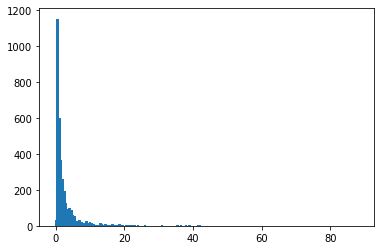

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.6, 8.7, 8.9, 9.0, 9.2, 9.5, 9.6, 9.9, 10.1, 11.2]
[638, 678, 716, 686, 820, 843, 896, 874, 1005, 950, 985, 961, 1095, 966, 1031, 1075, 951, 1050, 1034, 1022, 918, 943, 906, 900, 903, 869, 884, 787, 771, 763, 727, 665, 596, 566, 558, 485, 454, 389, 368, 362, 315, 294, 279, 207, 233, 170, 167, 135, 116, 110, 97, 100, 78, 52, 75, 56, 52, 38, 35, 28, 26, 29, 27, 24, 13, 15, 22, 26, 7, 4, 11, 6, 4, 4, 6, 3, 8, 3, 2, 2, 2, 3, 1, 4, 1, 3, 1, 5, 1, 1, 1, 1, 1, 1]


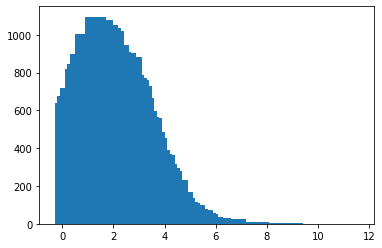

[0.5, 0.6, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.3, 16.5, 16.6, 16.9, 17.0, 17.1, 17.5, 17.6, 18.7]
[1, 1, 2, 2, 4, 5, 13, 25, 47, 56, 31, 66, 48, 106, 67, 97, 73, 79, 104, 90, 114, 86, 123, 125, 66, 107, 96, 90, 133, 67, 109, 99, 86, 92, 71, 99, 115, 67, 82, 109, 81, 90, 56, 98,

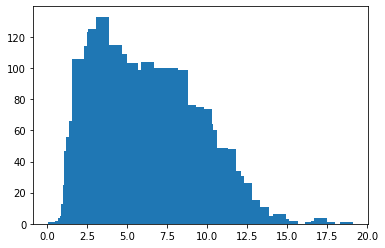

In [103]:
all_rain,all_WS,all_WSGust = get_weather_data(New_Taipei)
draw(all_rain)
draw(all_WS)
draw(all_WSGust)

### 桃園

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 2.0, 2.5, 2.7, 3.0, 3.4, 3.5, 4.0, 4.5, 5.0, 5.1, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 9.6, 10.0, 10.5, 11.0, 11.2, 11.4, 11.5, 12.0, 12.5, 12.8, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.0, 25.5, 26.0, 26.5, 27.0, 27.5, 28.0, 29.5, 30.0, 30.5, 31.0, 31.5, 32.0, 32.5, 34.0, 34.5, 35.0, 35.5, 36.0, 36.5, 37.0, 39.0, 41.0, 43.5, 44.0, 48.7, 49.5, 50.0, 125.0]
[3, 4, 3, 3, 1388, 1, 2, 3, 1, 585, 1, 2, 1, 1, 364, 2, 313, 199, 1, 136, 1, 120, 122, 106, 56, 1, 54, 37, 25, 31, 32, 24, 11, 20, 24, 2, 18, 1, 16, 1, 1, 8, 10, 4, 1, 5, 8, 2, 14, 1, 3, 5, 1, 6, 6, 4, 6, 3, 6, 2, 3, 3, 6, 3, 3, 2, 7, 3, 3, 2, 9, 3, 4, 2, 3, 4, 1, 9, 4, 1, 2, 2, 1, 2, 2, 1, 2, 3, 5, 1, 1, 1, 1, 1, 2, 1, 1]


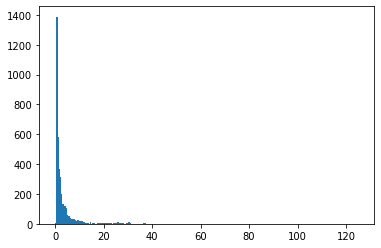

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.1, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.1, 11.4, 11.5, 11.6, 11.8, 12.0, 12.1, 12.2, 12.4, 13.7, 14.9]
[16, 800, 1468, 1523, 1443, 1379, 1239, 1454, 1332, 1259, 1315, 1077, 1272, 1218, 1163, 1127, 1013, 1003, 992, 906, 880, 795, 815, 836, 747, 721, 711, 791, 703, 559, 592, 535, 503, 506, 452, 459, 388, 356, 313, 361, 308, 259, 257, 218, 209, 160, 178, 153, 128, 101, 115, 89, 111, 68, 70, 64, 62, 50, 79, 53, 38, 38, 22, 27, 25, 20, 25, 22, 19, 23, 15, 14, 13, 10, 19, 9, 8, 3, 6, 7, 5, 3, 4

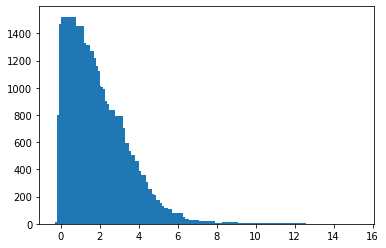

[1.2, 1.4, 1.5, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.2, 8.3, 8.4, 8.5, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 18.1, 18.3, 18.4, 18.5, 18.6, 18.8, 18.9, 19.0, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20.2, 20.4, 20.5, 20.8, 20.9, 21.1,

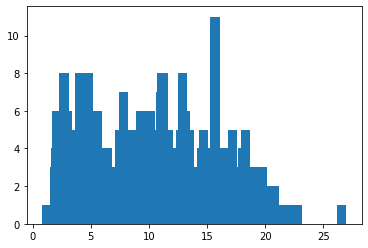

In [104]:
all_rain,all_WS,all_WSGust = get_weather_data(Taoyuan)
draw(all_rain)
draw(all_WS)
draw(all_WSGust)

### 台南

[0.5, 0.6, 1.0, 1.4, 1.5, 1.6, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.5, 26.0, 26.5, 27.0, 27.5, 28.0, 28.5, 29.0, 30.5, 31.0, 32.5, 33.5, 34.0, 35.0, 35.5, 36.0, 36.5, 37.0, 39.5, 41.0, 42.5, 44.0, 45.0, 46.0, 48.0, 48.5, 50.5, 53.0, 54.0, 54.5, 56.0, 58.5, 59.5, 63.0, 80.5, 86.0]
[794, 6, 301, 4, 213, 8, 171, 128, 77, 67, 67, 62, 37, 27, 33, 45, 23, 28, 18, 16, 11, 14, 22, 12, 14, 18, 11, 11, 8, 10, 8, 7, 7, 16, 9, 5, 2, 12, 7, 9, 1, 1, 3, 7, 3, 5, 1, 4, 3, 4, 2, 6, 1, 1, 3, 2, 5, 4, 2, 2, 2, 1, 3, 1, 4, 2, 2, 1, 1, 3, 1, 1, 6, 2, 2, 2, 1, 1, 1, 2, 1, 1, 3, 6, 1, 3, 1, 1]


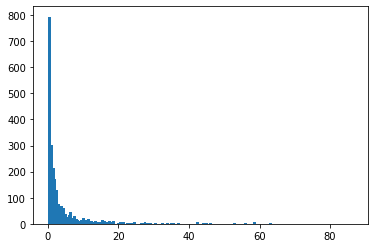

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.1, 9.2, 9.3, 9.4, 9.6, 9.9, 10.2, 10.5, 11.1, 12.1]
[194, 220, 317, 347, 457, 497, 534, 606, 765, 809, 915, 839, 1036, 1073, 1055, 1267, 1050, 1243, 1156, 1308, 1088, 1151, 1118, 1129, 1099, 1001, 1043, 982, 1045, 1043, 849, 865, 861, 827, 848, 609, 682, 632, 594, 523, 467, 467, 487, 296, 352, 298, 257, 277, 157, 165, 197, 147, 164, 113, 125, 107, 77, 103, 38, 66, 57, 53, 48, 47, 42, 31, 16, 24, 9, 29, 19, 19, 20, 11, 16, 11, 6, 6, 2, 3, 10, 1, 2, 6, 5, 3, 1, 4, 4, 3, 1, 1, 1, 2, 1, 1, 1, 1]


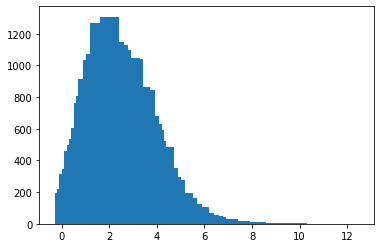

[1.1, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.1, 15.2, 15.3, 15.5, 15.6, 15.8, 16.0, 16.1, 16.3, 16.5, 16.6, 16.8, 16.9, 17.1, 17.3, 17.6, 18.0, 18.3, 18.4, 18.6, 19.1, 19.2, 19.6, 19.8, 20.6, 20.9, 21.2]
[3, 4, 9, 17, 30, 15, 44, 41, 67, 50, 51, 65, 80, 107, 69, 125, 124, 116, 145, 140, 143, 149, 176, 238,

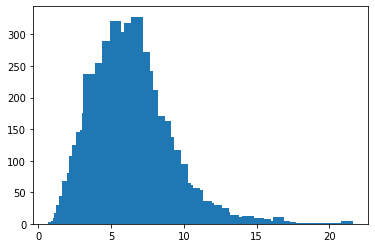

In [105]:
all_rain,all_WS,all_WSGust = get_weather_data(Tainan)
draw(all_rain)
draw(all_WS)
draw(all_WSGust)

### 高雄

[0.2, 0.3, 0.5, 0.6, 1.0, 1.5, 1.6, 2.0, 2.2, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.5, 22.0, 22.5, 23.5, 24.0, 24.5, 25.0, 26.0, 26.5, 27.0, 27.5, 28.0, 28.5, 29.0, 29.5, 30.0, 31.0, 31.5, 32.0, 33.5, 34.0, 34.5, 36.0, 37.5, 38.0, 40.0, 40.5, 41.5, 43.0, 44.5, 46.0, 66.5, 73.5, 77.0, 80.0]
[2, 5, 846, 2, 315, 198, 1, 139, 1, 107, 73, 56, 72, 46, 45, 35, 43, 36, 40, 27, 18, 30, 21, 7, 10, 21, 5, 14, 10, 9, 10, 7, 2, 6, 5, 2, 11, 6, 7, 3, 7, 1, 5, 4, 5, 8, 1, 3, 1, 9, 8, 2, 5, 2, 3, 4, 2, 6, 1, 2, 2, 5, 2, 2, 1, 1, 3, 3, 4, 1, 1, 1, 1, 6, 1, 2, 1, 1, 1, 1, 1]


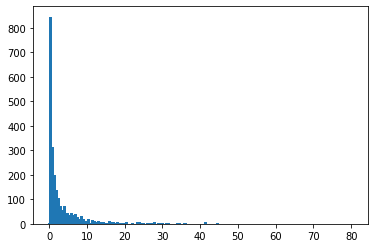

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.7, 7.8, 7.9, 8.0, 8.1, 8.3, 8.7, 8.9, 9.2, 9.3, 9.7, 10.0]
[282, 400, 465, 544, 790, 940, 1083, 1287, 1474, 1588, 1710, 1861, 1861, 1811, 1855, 1827, 1757, 1710, 1658, 1482, 1287, 1406, 1186, 1209, 1095, 908, 965, 838, 688, 683, 597, 539, 470, 438, 362, 333, 337, 279, 246, 222, 158, 192, 138, 94, 96, 95, 78, 63, 57, 56, 38, 31, 31, 25, 22, 20, 11, 20, 10, 13, 7, 6, 9, 7, 8, 4, 2, 2, 6, 3, 2, 3, 4, 3, 2, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1]


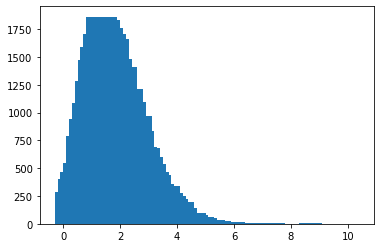

[1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.8, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.1, 12.2, 12.6, 12.9, 13.0, 13.9, 14.4, 14.6, 15.0, 15.2, 15.6, 15.9, 16.9, 17.9]
[3, 2, 1, 4, 2, 9, 10, 14, 17, 10, 18, 12, 23, 24, 34, 25, 45, 47, 30, 47, 46, 40, 52, 35, 30, 40, 46, 50, 60, 46, 51, 23, 60, 41, 33, 63, 38, 42, 42, 30, 45, 26, 42, 30, 46, 48, 21, 34, 27, 35, 51, 14, 15, 22, 16, 22, 13, 21, 17, 15, 28, 15, 21, 13, 6, 21, 9, 10, 9, 10, 8, 11, 5, 13, 11, 4, 10, 1, 2, 2, 7, 7, 1, 3, 4, 5, 3, 2, 4, 5, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1,

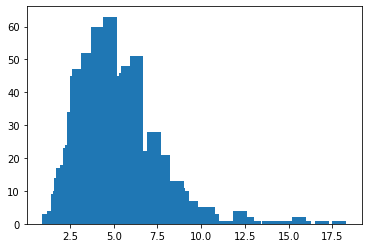

In [106]:
all_rain,all_WS,all_WSGust = get_weather_data(Kaohsiung)
draw(all_rain)
draw(all_WS)
draw(all_WSGust)